### Author - Komal
### Batch - JUNE BATCH A55
### Domain - Data Science

# SALES PREDICTION USING PYTHON
---

### Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

### In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.


## About Dataset :

### Description:
### The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers. It is required to understand the impact of ad budgets on the overall sales.


## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

## Reading the dataset

In [2]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.head(5) # Read first 5 rows

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail(5) # Read last 5 rows

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


## Information about the dataframe

### Shape of the dataframe

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Full Description

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


'observation ':

- Average Expense spend is highest on TV
- Average Expense spend is lowest on Radio
- Maximum sale is 27
- MInimum sale is 1.6


### Display All Columns

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Data Cleaning

### Checking for null/missing values in the dataset

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

'observation' :

- There is null/missing values present in the dataset

## Checking for duplicate values

In [10]:
df.duplicated().sum()

0

'observation' :

- There is no missing/duplicate values present in the dataset

## Exploratory Data Analysis

### Boxplot of Distribution of the variables

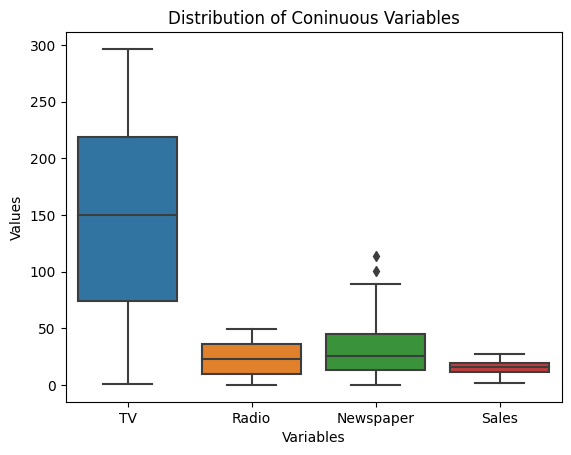

In [11]:
sns.boxplot(df.melt(value_vars = df.columns) , x = 'variable', y = 'value')
plt.title('Distribution of Coninuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


'observation' :

- TV has highest values among all.
- Sales is least values.
    

### Display Histplot of Different Variables

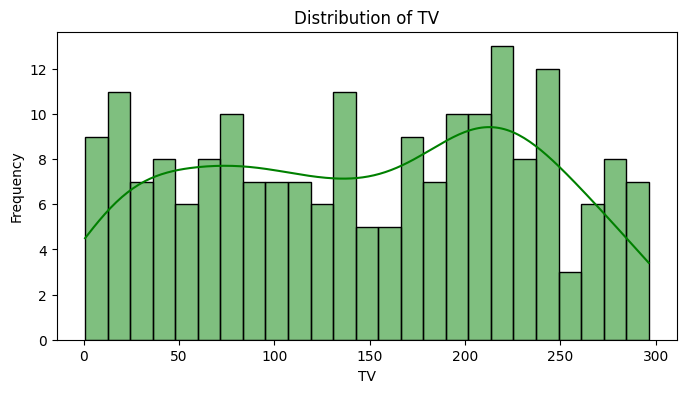

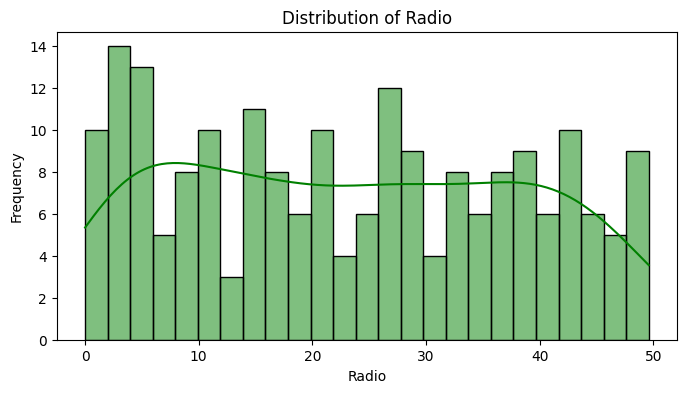

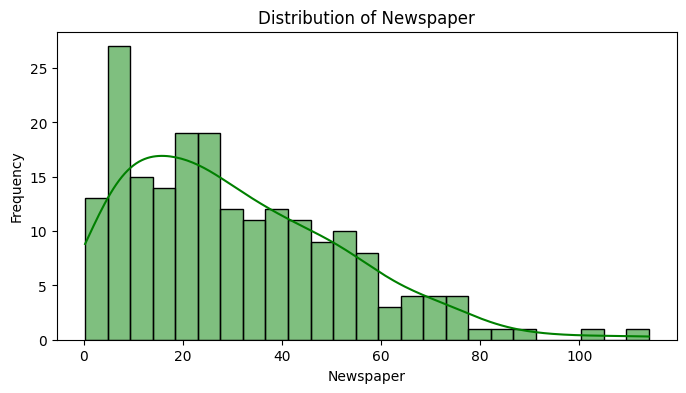

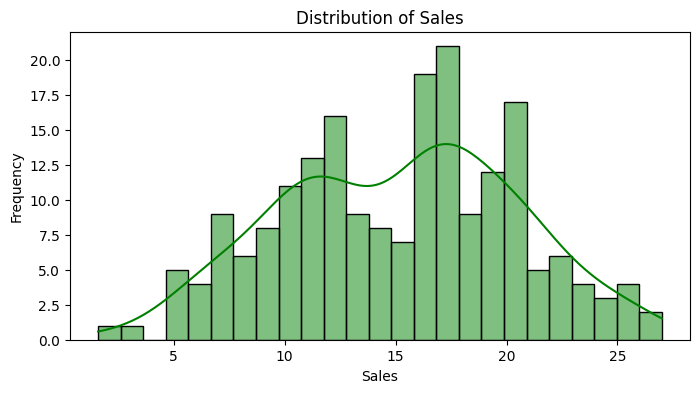

In [12]:
for feature in df.columns:
    plt.figure(figsize=(8, 4)) 
    plt.title(f'Distribution of {feature}')
    
    sns.histplot(df[feature], kde=True, bins=25, color='g')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    print('\n')
    

'Observations' :

- The TV distribution has more data points spread towards the higher values. This suggest that more money is spent TV advertisements.
- The Newspaper distribution seems to be positively skewed, with a long tail towards higher values. This suggests that higher spending on newspaper advertising is less common.


## Correlation Matrix 

### A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

### Correlation Between different advertisements and sales

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### Heatmap for Correlation

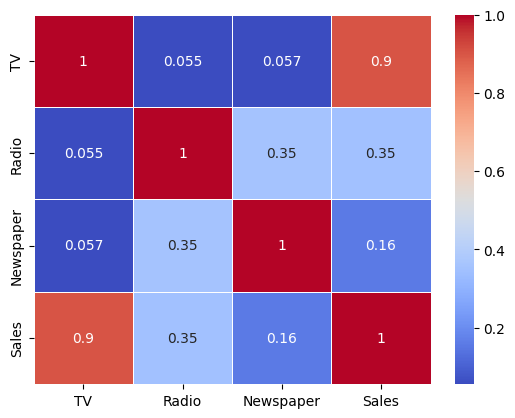

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidth = 0.5)
plt.show()


'Observation' :

- The strength of the relationship between the two variables is weak. This means that changes in one variable are not strongly associated with changes in the other variable.

- Positive Relationship: The positive sign indicates that as one variable increases, the other variable tends to increase as well, but the relationship is not strong.

- Limited Predictive Power: Since the correlation coefficient is low, it suggests that using one variable to predict the other may not be very accurate. In other words, knowing the value of one variable provides limited information about the value of the other variable.

- TV advertisements has highest impact on the sales with correlation 0.9
  

## Total money spent on each type of advertisement

### Calculate total expenditure for each type of advertisement

In [15]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [16]:
total_tv_spend = df['TV'].sum()
total_newspaper_spend = df['Newspaper'].sum()
total_radio_spend = df['Radio'].sum()

In [17]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Data for plotting

In [18]:
categories = ['TV', 'Newspaper', 'Radio']
totals = [total_tv_spend, total_newspaper_spend, total_radio_spend]

### Create the bar plot

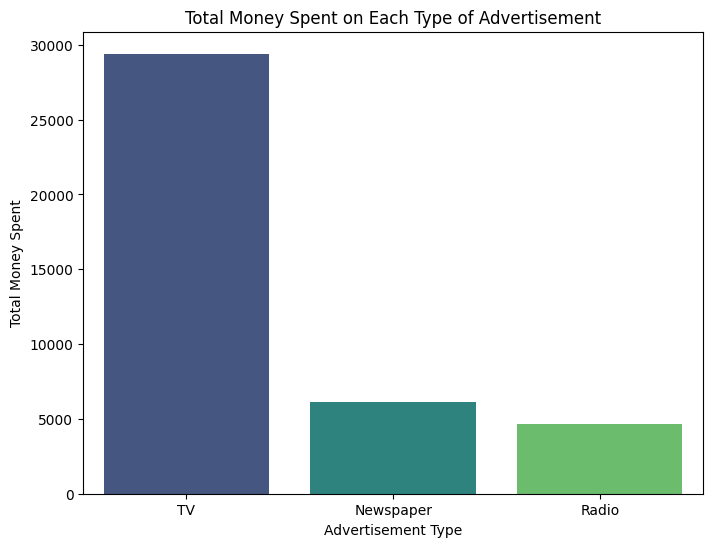

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=totals,palette='viridis')
plt.xlabel('Advertisement Type')
plt.ylabel('Total Money Spent')
plt.title('Total Money Spent on Each Type of Advertisement')
plt.show()


'observation' :

- Total money spent on each type of advertisement 
    - Tv is highest among all.
    - Newspaper is 2nd highest.
    - Radio is Least in all.



### Create Total_spent which is sum of TV , Radio and newspaper

In [20]:
df['Total_spent'] = df['TV']+df['Radio']+df['Newspaper']

### Display ScatterPlot for Total Spent Vs Sales

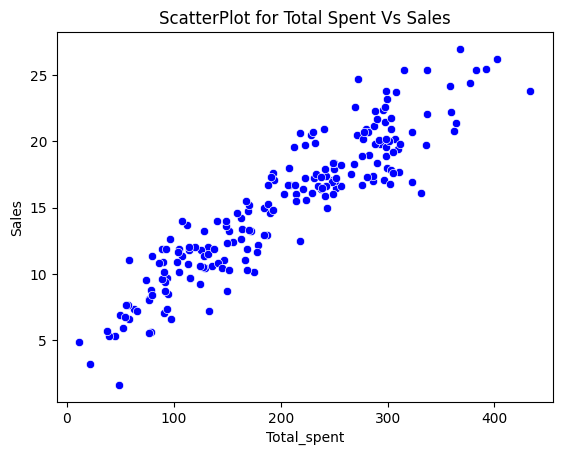

In [21]:
sns.scatterplot(x=df['Total_spent'], y=df['Sales'], color = 'b')
plt.title('ScatterPlot for Total Spent Vs Sales')
plt.show()


'Observation' :

- The scatter plot shows a positive linear correlation between Sales and Total spent. As the Total spent increases, sales increases too.
- This suggests that there is a positive association between advertising spending and sales.


## Machine learning

### Checking for outliers

### Outliers are values at the extreme ends of a dataset. Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.


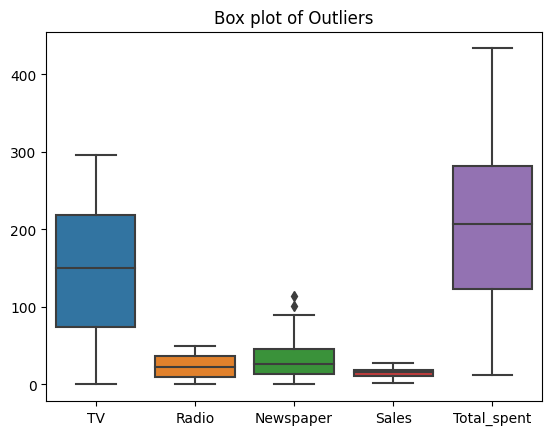

In [22]:
sns.boxplot(df)
plt.title('Box plot of Outliers')
plt.show()


### Feature and Target variable

In [23]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

### Train test split

### Import Library

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=11)

In [27]:
X_train

,TV,Radio,Newspaper
165,234.5,3.4,84.8
148,38.0,40.3,11.9
95,163.3,31.6,52.9
188,286.0,13.9,3.7
32,97.2,1.5,30.0
...,...,...,...
81,239.8,4.1,36.9
91,28.6,1.5,33.0
80,76.4,26.7,22.3
191,75.5,10.8,6.0


In [28]:
X_test

,TV,Radio,Newspaper
174,222.4,3.4,13.1
33,265.6,20.0,0.3
173,168.4,7.1,12.8
186,139.5,2.1,26.6
22,13.2,15.9,49.6
53,182.6,46.2,58.7
134,36.9,38.6,65.6
56,7.3,28.1,41.4
143,104.6,5.7,34.4
94,107.4,14.0,10.9


In [29]:
y_train

165    16.9
148    10.9
95     16.9
188    20.9
32     13.2
       ... 
81     17.3
91      7.3
80     11.8
191    11.9
153    16.0
Name: Sales, Length: 140, dtype: float64

In [30]:
y_test

174    16.5
33     17.4
173    16.7
186    10.3
22      5.6
53     21.2
134    10.8
56      5.5
143    10.4
94     11.5
55     23.7
73     11.0
130     1.6
41     17.1
14     19.0
63     14.0
16     12.5
60      8.1
111    21.8
0      22.1
2      12.0
46     10.6
86     12.0
88     12.9
61     24.2
162    19.9
77     14.2
126     6.6
198    25.5
3      16.5
135    11.6
29     10.5
25     17.0
26     15.0
93     22.2
36     25.4
83     13.6
151    11.6
139    20.7
120    15.5
163    18.0
137    20.8
30     21.4
103    19.7
98     25.4
11     17.4
54     20.2
97     20.5
101    23.8
52     22.6
42     20.7
154    20.6
123    15.2
194    17.3
150    16.1
192     5.9
112    17.1
156    15.3
9      15.6
87     16.0
Name: Sales, dtype: float64

### Model building

In [49]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)


LinearRegression()

In [50]:
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

## Model Evaluation

In [51]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("Mean absolute error of train data :",mean_absolute_error(y_train, y_pred_train))
print("Mean absolute error of test data :",mean_absolute_error(y_test, y_pred_test))

print("\nMean squared error of train data :",mean_squared_error(y_train,y_pred_train))
print("Mean squared error of test data :",mean_squared_error(y_test,y_pred_test))

print("\nr2 score(Train data) :",r2_score(y_train,y_pred_train))
print("r2 score(Test data) :",r2_score(y_test,y_pred_test))


Mean absolute error of train data : 1.1821333005984878
Mean absolute error of test data : 1.4085048291195872

Mean squared error of train data : 2.2350046057110093
Mean squared error of test data : 3.8532129007557123

r2 score(Train data) : 0.9144513153255296
r2 score(Test data) : 0.873218749161135


### The intercept or constant in the regression model represents the mean value of the response variable when all the predictor variables in the model are equal to zero. In linear regression, the intercept is the value of the dependent variable, i.e., Y when all values are independent variables, and Xs are zero

In [52]:
LR.intercept_

4.890053786492084

### Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

In [53]:
LR.coef_

array([ 0.05431123,  0.10162066, -0.0020213 ])

## Final Conclusion :
---

### Total money spent on each type of advertisement 
    - Tv is highest among all.
    - Newspaper is 2nd highest.
    - Radio is Least in all.


### A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.
    - TV advertisements has highest impact on the sales with correlation 0.9


### The Scatter Plot Sales Vs Total Spent(TV+Radio+Newspaper)
    - The scatter plot shows a positive linear correlation between Sales and Total spent. As the Total spent increases, sales increases too.
    - This suggests that there is a positive association between advertising spending and sales.
    



### Model Performance Metrics
1. Mean Absolute Error (MAE):
    - Train Data: 1.182
    - Test Data: 1.409



2. Mean Squared Error (MSE):
    - Train Data: 2.235
    - Test Data: 3.853



3. R-squared Score (R²):
    - Train Data: 0.914
    - Test Data: 0.873


### Interpretation of Results :

1. Model Accuracy:

    - The R-squared scores indicate that our model explains 91.4% of the variability in the training data and 87.3% in the test data. These high R-squared values suggest that the model is quite effective at predicting sales based on the given advertising data.
    - The MAE and MSE are higher for the test data compared to the training data, indicating that the model performs slightly worse on unseen data but still maintains a good level of accuracy.

2. Positive Linear Correlation:

    - The scatter plot shows a positive linear correlation between sales and total advertising spending. This indicates that as advertising spending increases, sales also tend to increase, demonstrating a positive association between these variables.
                                                                                
3. Effectiveness of Different Advertising Channels:

    - TV Advertising: TV advertisements have the highest impact on sales, making it the most effective advertising channel. This means that increased investment in TV advertising is strongly associated with increased sales.
    - Radio Advertising: The data for radio advertising shows a stable and evenly spread impact on sales. This suggests that while radio advertising may not have extreme effects, it represents a relatively safe and consistent advertising choice.
    - Newspaper Advertising: Newspaper advertising shows lower spending concentrations with fewer instances of high spending. This indicates that higher expenditures in newspaper advertising are less common and may not have a significant impact on sales compared to TV and radio advertising.

                                                                                                                                                                                 
### Recommendations : 
                                                                                                                                                                                 
1. Increase Investment in TV Advertising:
    - Given its strong positive impact on sales, it is recommended to allocate a larger portion of the advertising budget to TV advertisements.
                                                                                                                                                                                 
2. Maintain Stable Investment in Radio Advertising:
    - Radio advertising offers a stable return with less risk, making it a good choice for maintaining consistent sales.
                                                                                                                                                                                 
3. Evaluate Newspaper Advertising Strategy:
    - Given the lower impact of newspaper advertising, it may be beneficial to reevaluate the current spending strategy and consider reallocating some of the budget to more effective channels like TV or radio.


## Conclusion :
---

### The analysis demonstrates that advertising spending positively correlates with sales, with TV advertising having the highest impact. By strategically increasing investments in the most effective channels, the company can optimize its advertising budget to maximize sales and achieve better returns on investment.
